## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [ ]:
# Importing the data set
import pandas as pd
import matplotlib.pyplot as plt
Dataset = pd.read_csv("datasets/office_episodes.csv")
Dataset

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,2013-04-11,NaN,Matt Sohn,Dan Sterling,False,0.43750
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,2013-04-25,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,False,0.43750
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2013-05-02,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,True,0.75000
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,2013-05-09,NaN,David Rogers,Brent Forrester,False,0.90625


In [ ]:
# Creating variable with the number of each episode
episode_number = Dataset["episode_number"]
episode_number

0        0
1        1
2        2
3        3
4        4
      ... 
183    183
184    184
185    185
186    186
187    187
Name: episode_number, Length: 188, dtype: int64

In [ ]:
# Creating variable with the number of views for every episode
viewership = Dataset["viewership_mil"]
viewership

0      11.20
1       6.00
2       5.80
3       5.40
4       5.00
       ...  
183     3.83
184     3.25
185     3.51
186     4.56
187     5.69
Name: viewership_mil, Length: 188, dtype: float64

In [ ]:
# Creating function to apply it to a variable of the data set
def get_color(ratings) :
    if ratings < 0.25 :
        color = "red"
    elif ratings >= 0.25 and ratings < 0.50 :
        color = "orange"
    elif ratings >= 0.50 and ratings < 0.75 :
        color = "lightgreen"
    else :
        color = "darkgreen"
    return(color)

# Applying the created function to get one of the needed arguments for the graph
colors = Dataset["scaled_ratings"].apply(get_color)

In [ ]:
# Creating function to apply it to a variable of the data set
def get_size(guests) :
    if guests == True :
        size = 250
    else :
        size = 25
    return(size)

# Applying the created function to get another of the needed arguments for the graph
sizes = Dataset["has_guests"].apply(get_size)

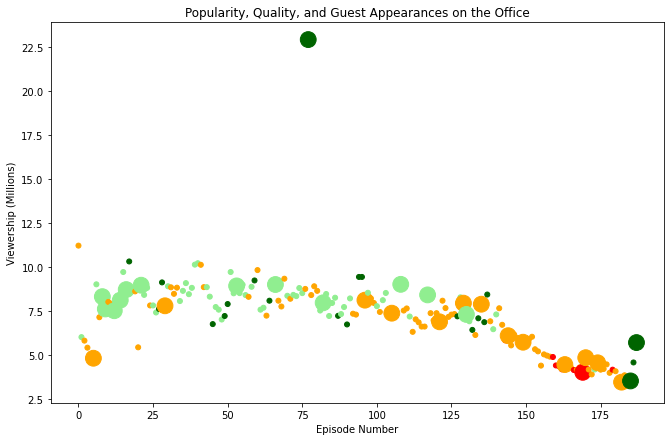

<Figure size 792x504 with 0 Axes>

In [ ]:
# Creating graph to display relation between the episode number and the viewership
# The color argument represents the ratings and the size argument represents if the episodes had famous guests  
fig = plt.figure()
plt.rcParams["figure.figsize"] = [11, 7]
plt.scatter(episode_number,viewership, c = colors,  s = sizes)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()
plt.clf()

In [ ]:
# Finding one of the famous guests in the most watched episode of the series 
row = Dataset[Dataset["viewership_mil"] == max(Dataset["viewership_mil"])]
list_stars = row.loc[77,"guest_stars"].split(",")
top_star = list_stars[0]
print(top_star)

Cloris Leachman
